<a href="https://colab.research.google.com/github/carloslme/handson-ml2-book/blob/main/02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [2]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  
  tgz_path = os.path.join(housing_path, 'housing.tgz')
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [3]:
fetch_housing_data()
print('Data downloaded!')

Data downloaded!


# Explore the data

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, 'housing.csv')
  return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* 25% of the districts have a housing_median_age lower than 18
* 50% are lower than 29 
* 75% are lower than 37

Saving figure attribute_histogram_plots


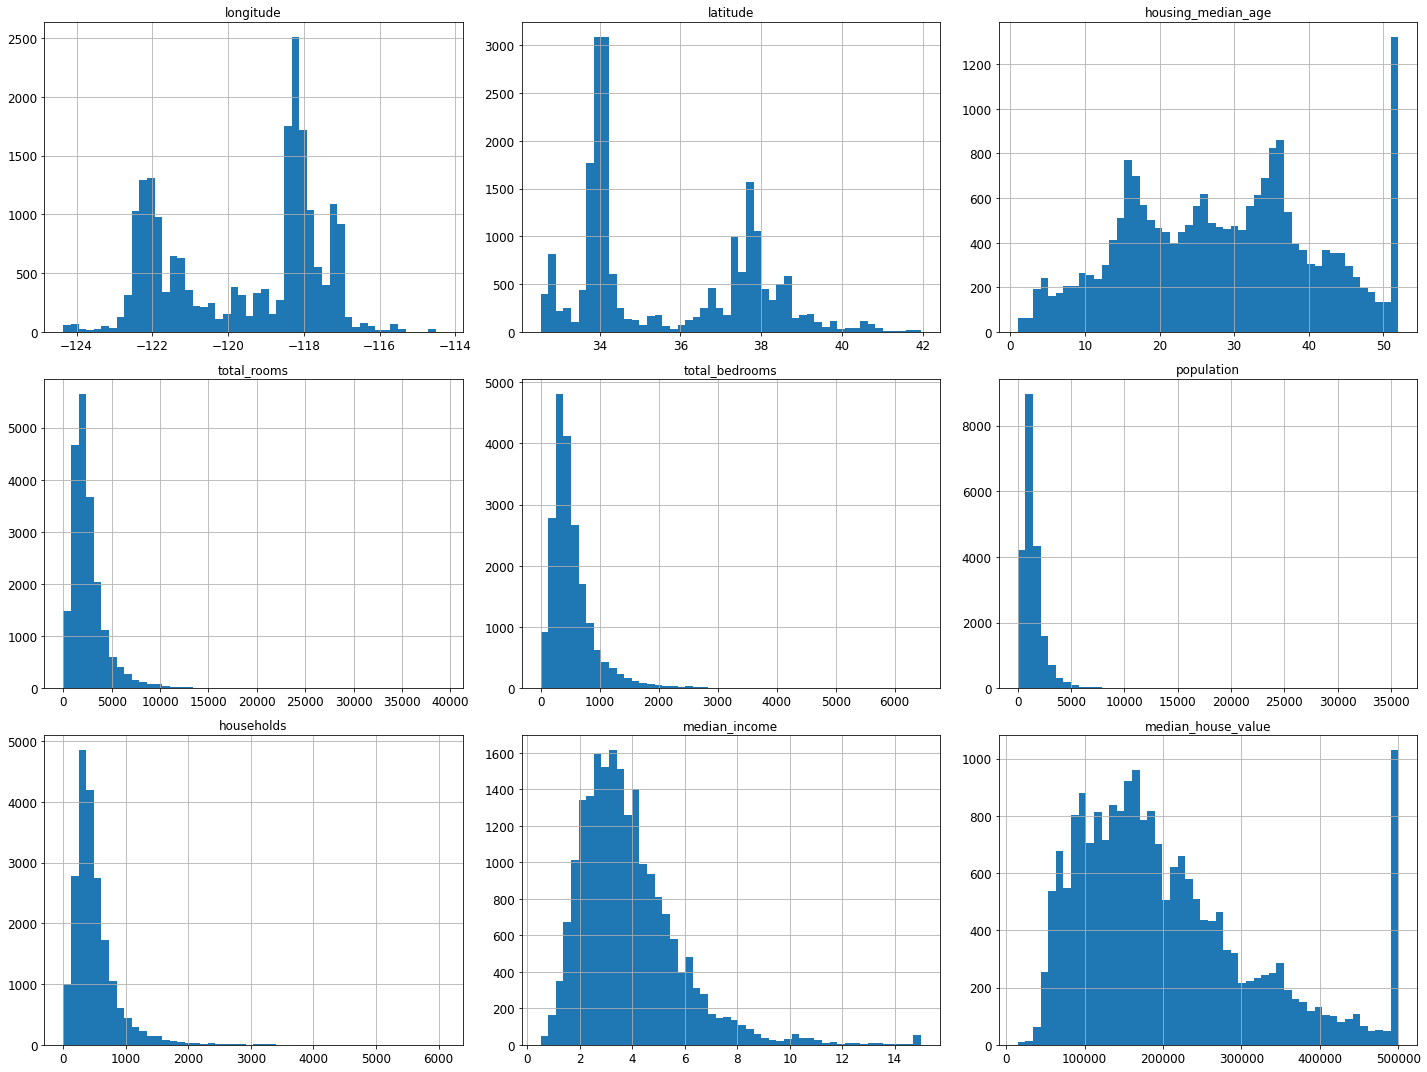

In [9]:
# Showing the number of instances (on the vertical axis) that have a given value range (on the horizontal axis)
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig('attribute_histogram_plots')
plt.show()

Few things to notice in the above histograms:

1.   First, the median income attribute does not look like it is expressed in US dollars (USD), but the numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about \$30,000).

2.   The housing meadian age and the median house value were also capped. This may be a serious problem since it is the target attribute (the labels). The ML algorithm may learn that prices never go beyond that limit. If required precise predictions even beyond \$500,000, the options are:
    
    a. Collect proper labels for the districts whose labels were capped.
    
    b. Remove those districts from the training and test set.

3.   These attributes have very different scales, is neccesary to apply feature scaling.

4.   Many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. Future transformations to these attributes have to be done in order to have more bell-shaped distributions.

Visualizing the data to have a better overview of how it is distributed with a kernel density estimate (KDE) plot, which is a method for visualizing the distribution of observations in a dataset.

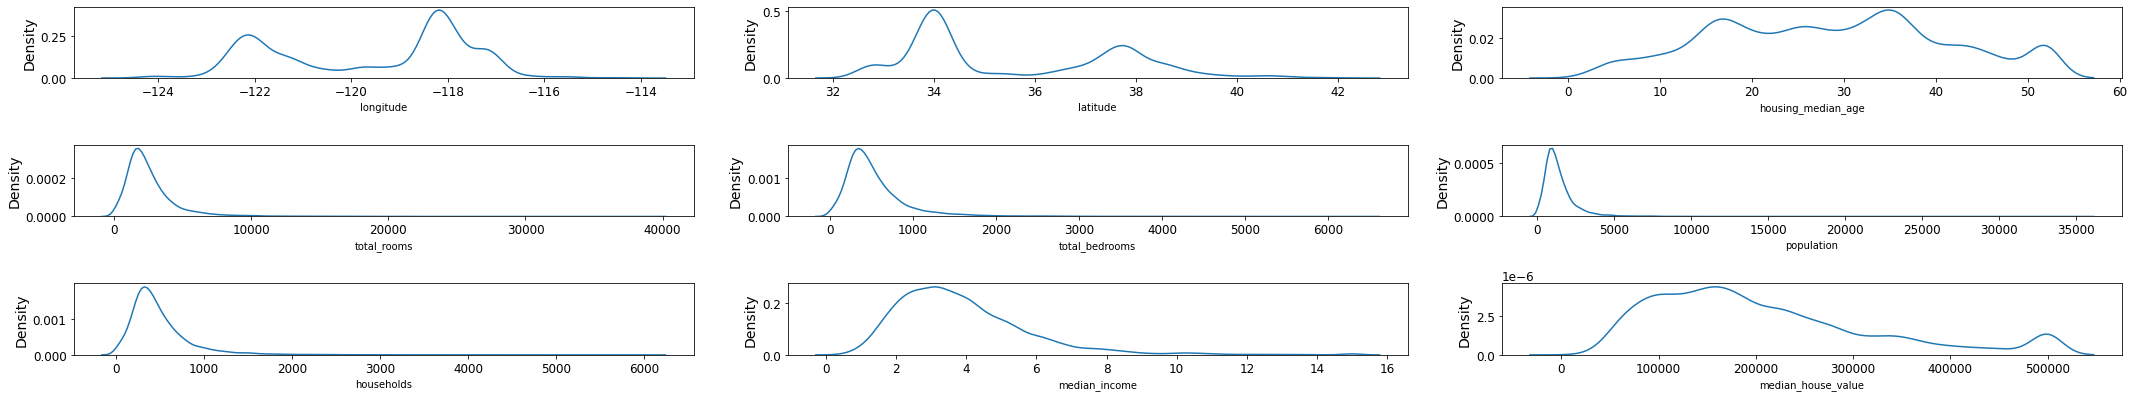

In [10]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(30,40))
for i, col in enumerate(housing.columns):
    if housing[col].dtype != 'object':
        ax = plt.subplot(21, 3, i+1)
        sns.kdeplot(housing[col], ax=ax)
        plt.xlabel(col, fontsize=10)
        plt.tight_layout(pad=2.0)
        
plt.show()

Then, in order to have a better view of quartiles of the dataset, and the outliers, let's plot some boxes.

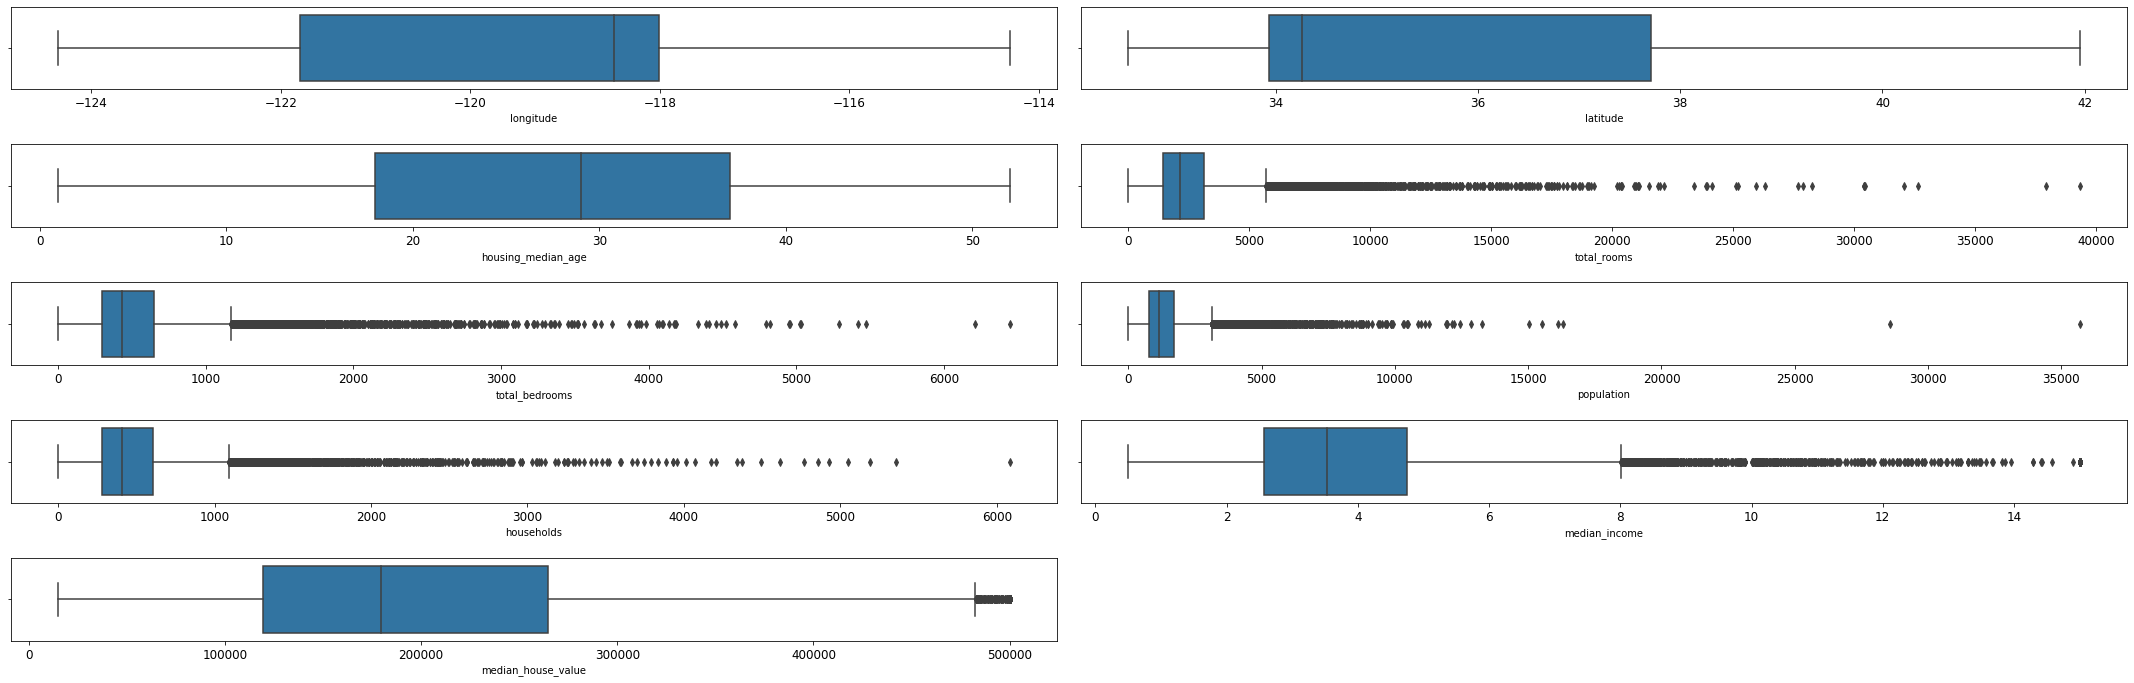

In [11]:
plt.figure(figsize=(30,40))
for i, col in enumerate(housing.columns):
    if housing[col].dtype != 'object':
        ax = plt.subplot(21, 2, i+1)
        sns.boxplot(housing[col], ax=ax)
        plt.xlabel(col, fontsize=10)
        plt.tight_layout(pad=2.0)
        
plt.show()

In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [13]:
import numpy as np

# For illustration only. Sklearn has train_test_split() [Implementation from scratch]
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [15]:
len(test_set)

4128

To ensure that the test set will remain consistent across multiple runs, even if the data is refreshed. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [16]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [18]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [19]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

Since the housing dataset does not have an identifier column, the simplest solution is to use index as the ID. 

If the row index is used as a unique identifier, it's neccesary to make sured that new data gets appended to the end of the dataset and that no row ever gets deleted. 

If that's not possible, then it can be tried to buils a unique identifier. For example, a district's latitude and longitude are guareanteed to be stable for a few million years.

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [21]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [22]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**Notes:**

A purely random sampling method is generally fine if the dataset is large enough (specially relative to the number of attributes), but if it is not, there is a risk of introducing a significant sampling bias. To solver this, a technique called *stratified sampling*: the population is divided into homogeneus subgroups called *strata*, and right number of instances are sampled from each stratum to guarantee the that test set is representative of the overall population. Otherwise, the selection result would be significantly biased.

In [24]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


It is supposed that the experts in this housing sataset say that the median income is a very important attribute to predict the median housing prices. To ensure that the test set is representative of the various categories of incomes in the whole dataset, an income category attribute  has to be created.

It is important to have a sufficient number of instances in the dataset of each stratum, or else the estimate of a stratum's importance may be biased. This means that it should not have too many strata, and each stratum should be large enough.

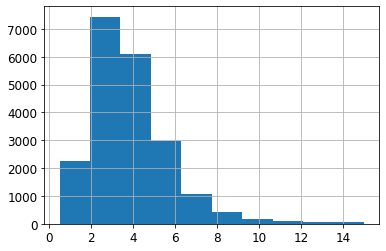

In [25]:
housing['median_income'].hist()

The following code uses the pd.cut() function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:

In [26]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [27]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

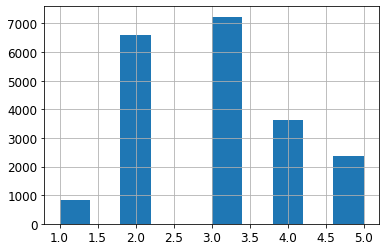

In [28]:
housing['income_cat'].hist()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [30]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [31]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [32]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

With similar code the income category proportions can be measured in the full dataset. 

In [33]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [34]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


The test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

# Discover and Visualize the Data to Gain Insights
If the training set is very large, a sample exploration set may be used to explore the data. For this case, the set is quite small, so it can be directly used.

In [35]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

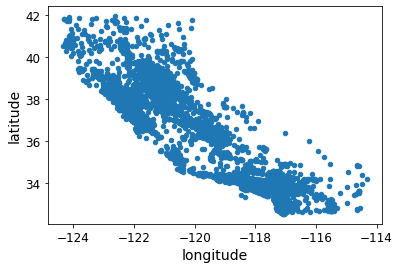

In [36]:
# Graphing the geographical information by latitude and longitude and using a scatterplot of all districts
housing.plot(kind='scatter', x='longitude', y='latitude')

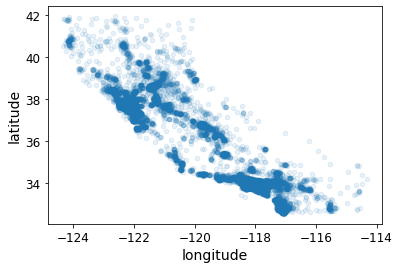

In [37]:
# To visualize some particular patterns, the alpha option has to be set to 0.1
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

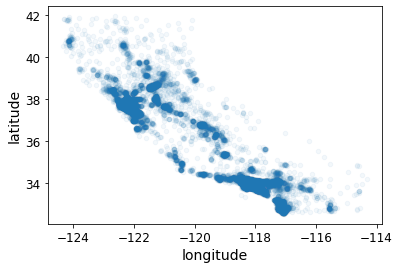

In [40]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.05)

For housing prices, in the next plot the population and price can be shown: the radius of each circle represents the district's population, and the color represents the price. The predefined color map called `jet` can be used.



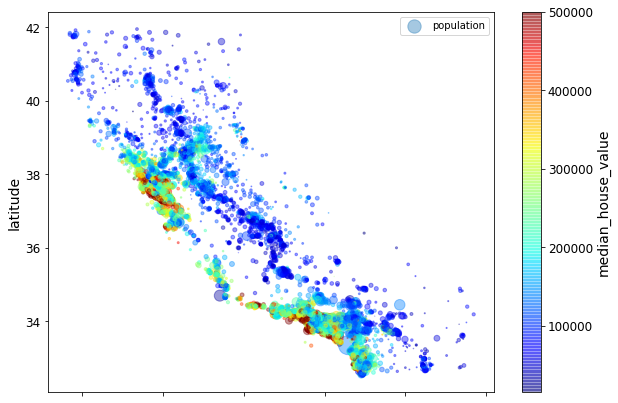

In [41]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude" , alpha = 0.4 , s = housing [ "population" ] / 100 , label = "population" , figsize = ( 10 , 7 ), c = "median_house_value" , cmap = plt . get_cmap ( "jet" ), colorbar = True , ) 
plt.legend ()

The image tells that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density. California housing prices: red is expensive, blue is cheap, larger circles indicate areas with a larger population

A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers.